# RMS Titanic Tragedy Survival Prediction

survival: 0 = no, 1 = yes               
pclass : Ticket class; 1=1st class,2= 2nd class, 3= 3rd class                                   
Age: Age in years              
Sibsp: no.of siblings/spouses aboard the titanic                                   
Parch: no.of parents/children aboard the titanic                                            
Ticket: Ticket number                                                        
Fare: passenger Fare                                                                                   
Cabin: cabin no.                                               
Embarked: Port of boarding; c=cherbourg, Q= Queenstown, S= Southampton

In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
data=pd.read_csv(r"C:\Users\HP\Downloads\IMS PYTHON COURSE\train project.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
newdata=data.copy()
newdata.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [67]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Highest no.of passengers boarded the Titanic From southampton 

In [68]:
data['Fare'].max()

512.3292

Highest price paid for the Ticket is  512.3292

# Exploratory Data Analysis

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
data.shape

(891, 12)

In [72]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

There are 608 people onboard who do not have any siblings / spouses travelling with them

In [73]:
data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

There are 678 people onboard who do not have any parents / children travelling with them

In [74]:
data['Family']=data['Parch'] + data['SibSp']
data['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

537 passengers were travelling without any siblings,parents,spouses & children

In [75]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are 577 Females & 314 Males onboard 

In [76]:
Survived=data[data.Survived==1]['Sex'].value_counts()
Survived

female    233
male      109
Name: Sex, dtype: int64

233 Females & 109 Males survived

In [77]:
def barchart(x):
    Survived=data[data.Survived==1][x].value_counts() #for classifying data '[x].value_counts()' is used
    Dead=data[data.Survived==0][x].value_counts()
    df=pd.DataFrame([Survived,Dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5)) #plot has been made based on the df dataset

In [78]:
#barchart('Sex')

survived:
 female    233
male      109
Name: Sex, dtype: int64
dead:
 male      468
female     81
Name: Sex, dtype: int64


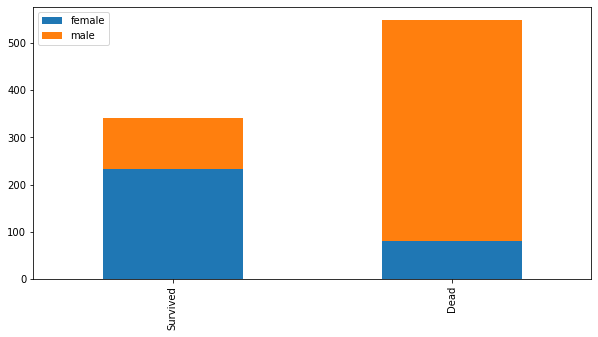

In [79]:
barchart('Sex')
print('survived:\n',data[data.Survived==1]['Sex'].value_counts())
print('dead:\n',data[data.Survived==0]['Sex'].value_counts())

survived:
 1    136
3    119
2     87
Name: Pclass, dtype: int64
dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


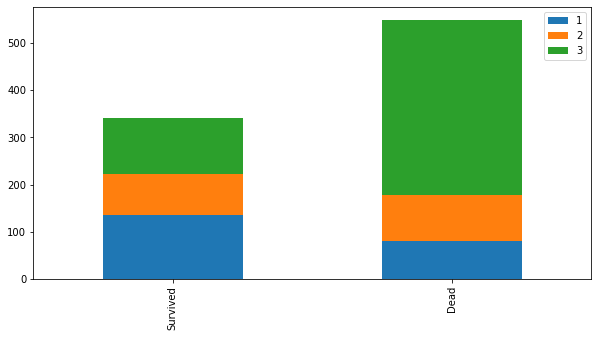

In [80]:
barchart('Pclass')
print('survived:\n',data[data.Survived==1]['Pclass'].value_counts())
print('dead:\n',data[data.Survived==0]['Pclass'].value_counts())

survived:
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


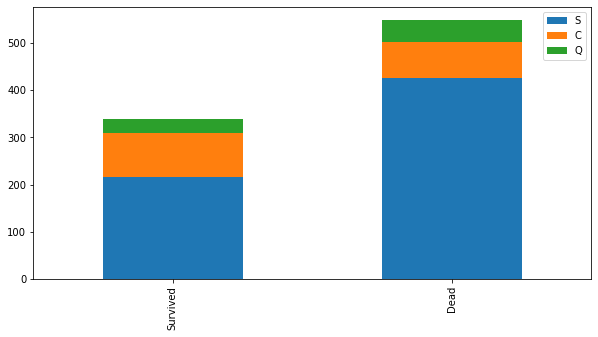

In [81]:
barchart('Embarked')
print('survived:\n',data[data.Survived==1]['Embarked'].value_counts())
print('dead:\n',data[data.Survived==0]['Embarked'].value_counts())

Text(0.5, 1.0, 'Max Age Group onboard Titanic ')

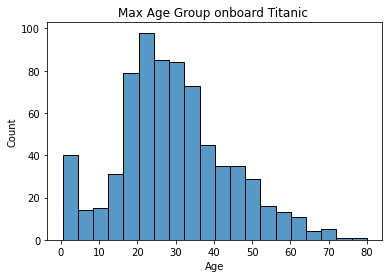

In [82]:
sns.histplot(data['Age']).set_title('Max Age Group onboard Titanic ')

 Age group of 20 to 40 are the maximum people travelling in Titanic

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare ~ Class')

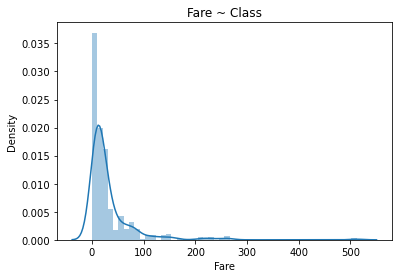

In [83]:
sns.distplot(data['Fare']).set_title('Fare ~ Class')

Fare is positive skewed i.e. passengers paying 0 to 100 are more in number and are belonging to 3rd class  

<AxesSubplot:xlabel='Pclass', ylabel='count'>

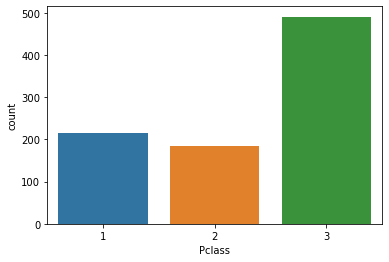

In [84]:
sns.countplot(x='Pclass',data=data)

 from above plot it is evident that 3rd class price ranges(0-100) & 2nd class price ranges (101-200), 
1st class price (210-500)

In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [86]:
data.dropna(inplace=True)

In [87]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family         0
dtype: int64

In [88]:
newdata=newdata.drop(['Cabin','Name','PassengerId','Ticket','SibSp','Parch'],axis=1)

## Outlier Treatment

<AxesSubplot:>

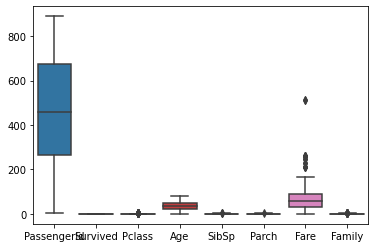

In [89]:
sns.boxplot(data=data)

In [90]:
q1=newdata['Pclass'].quantile(0.25)
q3=newdata['Pclass'].quantile(0.75)
IQR=q3-q1
upperlimit=q3+1.5*IQR

In [91]:
newdata.Pclass=np.where(newdata['Pclass']>upperlimit,upperlimit,newdata['Pclass'])

In [92]:
q1=newdata['Fare'].quantile(0.25)
q3=newdata['Fare'].quantile(0.75)
IQR=q3-q1
upperlimit=q3+1.5*IQR

In [93]:
newdata.Fare=np.where(newdata['Fare']>upperlimit,upperlimit,newdata['Fare'])

In [94]:
q1=newdata['Age'].quantile(0.25)
q3=newdata['Age'].quantile(0.75)
IQR=q3-q1
upperlimit=q3+1.5*IQR

In [95]:
newdata.Age=np.where(newdata['Age']>upperlimit,upperlimit,newdata['Age'])

<AxesSubplot:>

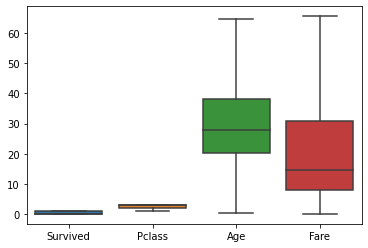

In [96]:
sns.boxplot(data=newdata)

In [97]:
newdata.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3.0,male,22.0,7.2500,S
1,1,1.0,female,38.0,65.6344,C
2,1,3.0,female,26.0,7.9250,S
3,1,1.0,female,35.0,53.1000,S
4,0,3.0,male,35.0,8.0500,S


In [98]:
from sklearn.preprocessing import LabelEncoder as l
newdata=newdata.apply(l().fit_transform)

In [99]:
newdata.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,2,1,28,18,2
1,1,0,0,51,203,0
2,1,2,0,34,41,2
3,1,0,0,47,189,2
4,0,2,1,47,43,2


In [100]:
c=newdata.corr()

<AxesSubplot:>

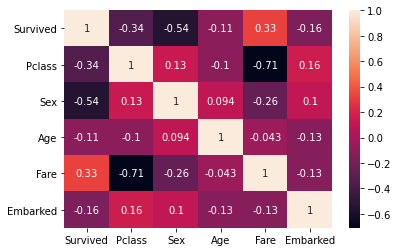

In [101]:
sns.heatmap(c,annot=True)

## Hypothesis Testing

Ho - There is no relationship between survived & other variables           
H1 - There is a significant relationship between survived & other variables

Alpha- 0.05

# Model building and application on test data

In [102]:
from sklearn.model_selection import train_test_split
x=newdata.drop('Survived',axis=1)
y=newdata.Survived
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=70)

In [103]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [104]:
predict=lr.predict(xtest)

# Accuracy of the Model

In [105]:
confusion_matrix(predict,ytest)

array([[144,  29],
       [ 12,  83]], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(ytest,predict)

0.8470149253731343

In [108]:
p=classification_report(ytest,predict)
print(p)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       156
           1       0.87      0.74      0.80       112

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.84       268



In [109]:
model=pd.concat([xtest,ytest],axis=1)
model['predicted']=predict
model.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,predicted
215,0,0,41,203,0,1,1
513,0,0,69,197,0,1,1
53,1,0,38,138,2,1,1
221,1,1,35,85,2,0,0
883,1,1,36,72,2,0,0


## ROC_Curve & AUC Score

if the AUC score is <=0.5 then the model is BAD Classifier & 1 denotes Best Classifier

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [111]:
score=roc_auc_score(ytest,lr.predict(xtest))

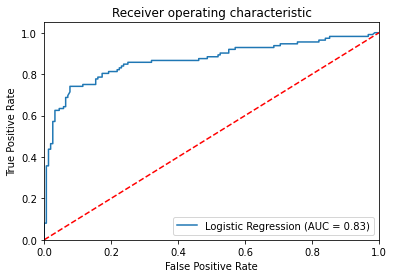

In [112]:
fpr,tpr,threshold=roc_curve(ytest,lr.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (AUC = %0.2f)'%score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Therefore Area Under the Curve is 0.82 i.e. 82% chance the model will distinguish between survived and dead

## Model Save & Load 

In [113]:
import pickle

In [114]:
with open('lr_pickle','wb')as f: # wb - write binary,lr_pickle- name for saving the file
    pickle.dump(lr,f) # just aliasing the file as f for convenience

In [115]:
with open('lr_pickle','rb')as f:# rb - read binary
    m=pickle.load(f) # for reusing the model 